<a href="https://colab.research.google.com/github/KARENCMP82/Python/blob/main/Bloque_3_3_Computer_Vision_Data_Augmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **DATA AUGMENTATION**

In [1]:
# SOLO PARA USO EN GOOGLE COLABORATORY
# Para conectar el notebook con la cuenta de gdrive
from google.colab import drive
drive.mount('/content/drive/')

BASE_FOLDER = "/content/drive/MyDrive/Colab Notebooks/Ejercicios/" # Ajustar el directorio raíz de Google Drive

Mounted at /content/drive/


#### **- Cargando el conjunto de datos**

In [22]:
from tensorflow.keras.datasets import cifar10
((trainX, trainY), (testX, testY)) = cifar10.load_data()
labelNames = ["Avión", "Automóvil", "Pájaro", "Gato", "Ciervo", "Perro", "Rana", "Caballo", "Barco", "Camión"]
# (Y también incluye aquí la normalización y el to_categorical si los haces)
# trainX_norm = trainX / 255.0
# testX_norm = testX / 255.0
# num_classes = 10
# trainY_cat = to_categorical(trainY, num_classes)
# testY_cat = to_categorical(testY, num_classes)

# ... (código anterior de capas xfc) ...

# Clasificador softmax
# CORREGIR: Definir num_classes para CIFAR-10 ANTES de usarlo
num_classes = 10 # CIFAR-10 tiene 10 clases
predictions = Dense(num_classes, activation="softmax")(xfc) # Ahora 'num_classes' existe

# ... (resto del código del modelo) ...


#### **- Acondicionando el conjunto de datos**

In [23]:
# PREPROCESADO DE LOS DATOS
trainX = trainX / 255.0
testX = testX / 255.0

print(trainY.shape)
print(testY.shape)

# Por si es necesario convertir a one-hot encoding
lb = LabelBinarizer()
trainY = lb.fit_transform(trainY)
testY = lb.transform(testY)
print(trainY.shape)
print(testY.shape)
print(trainX.shape)
print(testX.shape)

(50000, 1)
(10000, 1)
(50000, 10)
(10000, 10)
(50000, 32, 32, 3)
(10000, 32, 32, 3)


#### **- Creando un contenedor DataGenerator para el aumento automático de muestras**

In [24]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(#objeto, hace las tranformaciones de imagenes
    rotation_range=15, # grados de rotación aleatoria
    width_shift_range=0.1, # fracción del total (1) para mover la imagen
    height_shift_range=0.1, # fracción del total (1) para mover la imagen
    horizontal_flip=True, # girar las imagenes horizontalmente (eje vertical)
    # shear_range=0, # deslizamiento
    # zoom_range=0.1, # rango de zoom
    # fill_mode='nearest', # como rellenar posibles nuevos píxeles
    # channel_shift_range=0.2 # cambios aleatorios en los canales de la imagen

    ##################################################
    # (X) INPUT - Definir la partición de validación
    ##################################################
)

#### **- Inspeccionando las muestras generadas sintéticamente**

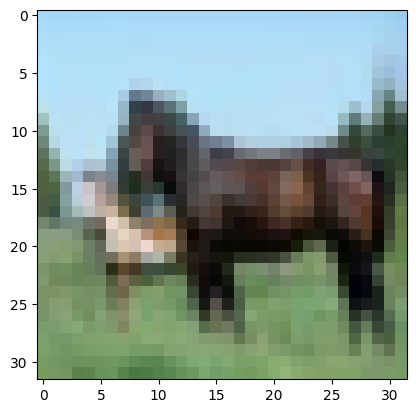

Label = Caballo


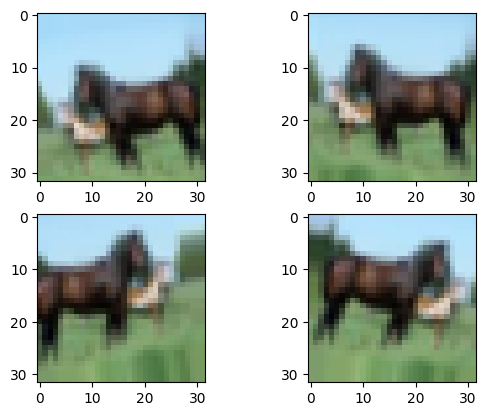

In [25]:
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
%matplotlib inline

sample = 12
plt.imshow(image.array_to_img(trainX[sample]))
plt.show()
print('Label = {}'.format(labelNames[trainY[sample].argmax(axis=0)]))

fig, axes = plt.subplots(2,2)
i = 0
for batch in datagen.flow(trainX[sample].reshape((1,32,32,3)),batch_size=1):
    axes[i//2,i%2].imshow(image.array_to_img(batch[0]))
    i += 1
    if i == 4:
        break
plt.show()

#### **- Creando la topología de red neuronal y entrenándola: CNN**

In [26]:
# Import the necessary packages
import numpy as np
from tensorflow.keras import backend as K
from tensorflow.keras.layers import Input, Conv2D, Activation, Flatten, Dense, Dropout, BatchNormalization, MaxPooling2D
from tensorflow.keras.models import Model
# from tensorflow.keras.models import Sequential # CORREGIR: No necesitas Sequential si usas la API Funcional (Model)
from tensorflow.keras.optimizers import SGD, Adam
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
from google.colab import drive
# CORREGIR: Faltan estas importaciones
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# --- ASUMO QUE ESTAS VARIABLES YA EXISTEN DE CELDAS ANTERIORES ---
# Necesitas tener cargados los datos (ej. de cifar10 o cifar100) en variables como:
# x_train, y_train, x_test, y_test
# Y también haberlos preprocesado (normalizado / 255.0 y convertido a one-hot con to_categorical) en:
# x_train_norm, y_train_cat, x_test_norm, y_test_cat
# Y tener definido num_classes (ej. 10 para CIFAR-10, 100 para CIFAR-100)
# Y tener definidos epochs y batch_size
# --- FIN DE ASUNCIONES ---

# --- Definición de la Arquitectura (API Funcional) ---
# CORREGIR: Asegúrate de que trainX existe y tiene la forma correcta (ej. x_train_norm de CIFAR)
# Si usas x_train directamente de cifar100.load_data(), la forma sería (50000, 32, 32, 3)
# PERO es mejor usar los datos normalizados: x_train_norm
# Asumiré que quieres usar x_train_norm (ya normalizado)
# Si aún no lo has dividido, lo haremos después. Por ahora, tomamos la forma del original.
# Si x_train no existe, esta línea dará error. Carga los datos primero.
input_shape_correct = (trainX.shape[1], trainX.shape[2], trainX.shape[3]) # (ej: 32, 32, 3)
inputs = Input(shape=input_shape_correct) # CORREGIR: Usar la forma correcta

# Primer set de capas CONV => RELU => CONV => RELU => POOL
x1 = Conv2D(32, (3, 3), padding="same", activation="relu")(inputs)
x1 = BatchNormalization()(x1)
x1 = Conv2D(32, (3, 3), padding="same", activation="relu")(x1)
x1 = BatchNormalization()(x1)
x1 = MaxPooling2D(pool_size=(2, 2))(x1)
x1 = Dropout(0.25)(x1)

# Segundo set de capas CONV => RELU => CONV => RELU => POOL
x2 = Conv2D(64, (3, 3), padding="same", activation="relu")(x1)
x2 = BatchNormalization()(x2)
x2 = Conv2D(64, (3, 3), padding="same", activation="relu")(x2)
x2 = BatchNormalization()(x2)
x2 = MaxPooling2D(pool_size=(2, 2))(x2)
x2 = Dropout(0.25)(x2)

# Tercer set de capas CONV => RELU => CONV => RELU => POOL
# CORREGIR: El número de filtros (256) puede ser mucho para empezar con 32x32. Podrías probar 128.
x3 = Conv2D(128, (3, 3), padding="same", activation="relu")(x2) # CORREGIR (Opcional): Cambiado 256 a 128
x3 = BatchNormalization()(x3)
x3 = Conv2D(128, (3, 3), padding="same", activation="relu")(x3) # CORREGIR (Opcional): Cambiado 256 a 128
x3 = BatchNormalization()(x3)
x3 = MaxPooling2D(pool_size=(2, 2))(x3)
x3 = Dropout(0.25)(x3)

# Primer (y único) set de capas FC => RELU
xfc = Flatten()(x3)
xfc = Dense(512, activation="relu")(xfc)
xfc = BatchNormalization()(xfc)
xfc = Dropout(0.5)(xfc)

# Clasificador softmax
# CORREGIR: La capa de salida debe tener 'num_classes' neuronas (ej. 10 o 100), no 10 fijas.
# Asumiré que 'num_classes' está definido antes (ej. num_classes=100 para CIFAR-100)
predictions = Dense(num_classes, activation="softmax")(xfc)

# Unimos las entradas y el modelo mediante la función Model
model_aug = Model(inputs=inputs, outputs=predictions)

# Compilar el modelo
print("[INFO]: Compilando el modelo...")
# CORREGIR: La pérdida debe ser 'categorical_crossentropy' si tus etiquetas (trainY/y_train_cat) están en formato one-hot.
# 'binary_crossentropy' es para 2 clases. 'sparse_categorical_crossentropy' si las etiquetas son números enteros.
# Usaremos 'categorical_crossentropy' asumiendo que hiciste to_categorical antes.
model_aug.compile(loss="categorical_crossentropy", optimizer=Adam(learning_rate=0.001), metrics=["accuracy"])

#### HASTA AQUÍ LA DEFINICIÓN Y COMPILACIÓN DEL MODELO ####

# --- CAMBIOS IMPORTANTES PARA EL ENTRENAMIENTO Y LA EVALUACIÓN ---

# CORREGIR: Dividir los datos preprocesados (asumiendo que existen) en entrenamiento y validación ANTES
print("[INFO]: Dividiendo datos para entrenamiento y validación...")
# Usa las variables con datos normalizados y categorizados (ej. x_train_norm, y_train_cat)
# Si no las tienes, debes crearlas antes (normalizar x, categorizar y)
x_tr_norm, x_val_norm, y_tr_cat, y_val_cat = train_test_split(
    x_train_norm, y_train_cat,
    test_size=0.1, # Por ejemplo, 10% para validación
    random_state=42 # Para reproducibilidad
)
print("Datos listos para entrenamiento y validación.")


# CORREGIR: Crear el ImageDataGenerator ANTES de usarlo.
# Define aquí si quieres Data Augmentation o no.
print("[INFO]: Creando generadores de datos...")
# Generador para entrenamiento CON Data Augmentation (ejemplo)
datagen_train = ImageDataGenerator(
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
    zoom_range=0.1
    # Puedes añadir más opciones
)
# Es buena práctica ajustarlo (fit) a los datos de entrenamiento
datagen_train.fit(x_tr_norm)

# Generador para validación SIN Data Augmentation
datagen_val = ImageDataGenerator() # Simple, sin transformaciones

# CORREGIR: Crear los generators usando el datagen definido y los datos divididos, SIN 'subset'
# Define tu batch_size si no lo has hecho (ej. batch_size = 128)
batch_size = 128 # O el valor que prefieras

train_generator = datagen_train.flow(
  x_tr_norm, # CORREGIR: Usar datos de entrenamiento divididos y normalizados
  y_tr_cat,  # CORREGIR: Usar etiquetas de entrenamiento divididas y categorizadas
  batch_size=batch_size # CORREGIR: Usar la variable batch_size
)

validation_generator = datagen_val.flow( # CORREGIR: Usar el generador de validación
  x_val_norm, # CORREGIR: Usar datos de validación divididos y normalizados
  y_val_cat,  # CORREGIR: Usar etiquetas de validación divididas y categorizadas
  batch_size=batch_size # CORREGIR: Usar la variable batch_size
)
print("Generadores creados.")

# CORREGIR: Calcular steps_per_epoch y validation_steps para model.fit
steps_per_epoch = len(x_tr_norm) // batch_size
validation_steps = len(x_val_norm) // batch_size

# CORREGIR: Definir las épocas si no lo has hecho (ej. epochs = 50)
epochs = 50 # O el valor que prefieras

# Entrenamiento de la red
print("[INFO]: Entrenando la red...")
# CORREGIR: Ajustar la llamada a fit para usar generadores y steps
H_aug = model_aug.fit(
            train_generator,
            steps_per_epoch = steps_per_epoch, # CORREGIR
            validation_data = validation_generator,
            validation_steps = validation_steps, # CORREGIR
            epochs = epochs) # CORREGIR: Usar la variable epochs
            # 'workers' no es un parámetro estándar aquí, se maneja internamente


# --- CORREGIR: Guardado y Evaluación ---

# Montamos la unidad de Drive (Opcional, si quieres guardar)
# drive.mount('/content/drive')
# CORREGIR: Define BASE_FOLDER si vas a guardar
# BASE_FOLDER = '/content/drive/MyDrive/MiCarpeta/' # EJEMPLO! Cambia a tu ruta
# Almacenamos el modelo empleando la función model.save de Keras
# print("[INFO]: Guardando modelo...")
# model_aug.save(BASE_FOLDER + "mi_cnn_desde_cero_aug.h5") # Nombre descriptivo
# print("Modelo guardado.")


# Evaluación del modelo
print("[INFO]: Evaluando el modelo...")
# Efectuamos la predicción sobre los datos de TEST preprocesados
# CORREGIR: Usar x_test_norm y definir batch_size si no lo has hecho
predictions = model_aug.predict(x_test_norm, batch_size=batch_size)

# Sacamos el report para test
# CORREGIR: Usar y_test_cat y definir labelNames si no lo has hecho
# labelNames = [...] # Tu lista de nombres de clases
print(classification_report(y_test_cat.argmax(axis=1), predictions.argmax(axis=1), target_names=labelNames))

# Gráficas
print("[INFO]: Mostrando gráficas...")
plt.style.use("ggplot")
plt.figure()
# CORREGIR: Usar la variable epochs para el rango del gráfico
plt.plot(np.arange(0, epochs), H_aug.history["loss"], label="train_loss")
plt.plot(np.arange(0, epochs), H_aug.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, epochs), H_aug.history["accuracy"], label="train_acc")
plt.plot(np.arange(0, epochs), H_aug.history["val_accuracy"], label="val_acc")
plt.title("Pérdida y Precisión del Entrenamiento")
plt.xlabel("Época #")
plt.ylabel("Pérdida/Precisión")
plt.legend()
plt.show()

[INFO]: Compilando el modelo...
[INFO]: Dividiendo datos para entrenamiento y validación...


NameError: name 'x_train_norm' is not defined

Resultado: Mejora de accuracy (gracias a que tenemos más muestras)

**EJERCICIO PROPUESTO:** Completar las líneas de código marcadas con # (X) IMPUT en:
- train_generator
- validation_generator
- datagen

Partes a completar:

A) Llevar a cabo la partición de validation cuando se instancia el objeto ImageDataGenerator

B) Asignar correctamente las muestras generadas de train y validation al método flow de train_generator y validation_generator

Consultar documentación:
- https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/image/ImageDataGenerator
- https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/image/ImageDataGenerator#flow
